In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read in data (old)  

In [3]:
# later time step
nn = 150
# step interval
dn1 = 10
dn2 = 50

filename1A=('../data/ptcls_info_t%3.3d.dat')%(nn)
Ax1,Ay1,Avx1,Avy1,Avz1,Am1,Ape1=np.loadtxt(filename1A,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2A=('../data/ptcls_info_t%3.3d.dat')%(nn+dn1)
Ax2,Ay2,Avx2,Avy2,Avz2,Am2,Ape2=np.loadtxt(filename2A,usecols=[0,1,2,3,4,5,6],unpack=True)
filename3A=('../data/ptcls_info_t%3.3d.dat')%(nn+dn2)
Ax3,Ay3,Avx3,Avy3,Avz3,Am3,Ape3=np.loadtxt(filename3A,usecols=[0,1,2,3,4,5,6],unpack=True)

omega_barA = 0.542

R_max = 8.

In [4]:
# later time step
nn = 250
# step interval
dn1 = 10
dn2 = 50

filename1B=('./ptcls_info_t%3.3d.dat')%(nn)
Bx1,By1,Bvx1,Bvy1,Bvz1,Bm1,Bpe1=np.loadtxt(filename1B,usecols=[0,1,2,3,4,5,6],unpack=True)
filename2B=('./ptcls_info_t%3.3d.dat')%(nn+dn1)
Bx2,By2,Bvx2,Bvy2,Bvz2,Bm2,Bpe2=np.loadtxt(filename2B,usecols=[0,1,2,3,4,5,6],unpack=True)
filename3B=('./ptcls_info_t%3.3d.dat')%(nn+dn2)
Bx3,By3,Bvx3,Bvy3,Bvz3,Bm3,Bpe3=np.loadtxt(filename3B,usecols=[0,1,2,3,4,5,6],unpack=True)

omega_barB = 0.480

In [5]:
Ar1 = [np.sqrt(Ax1[i]**2 + Ay1[i]**2) for i in range(len(Ax1))]
Ar2 = [np.sqrt(Ax2[i]**2 + Ay2[i]**2) for i in range(len(Ax2))]
Ar3 = [np.sqrt(Ax3[i]**2 + Ay3[i]**2) for i in range(len(Ax3))]
Aang1 = [Ax1[i]*Avy1[i]-Ay1[i]*Avx1[i] for i in range(len(Ax1))]
Aang2 = [Ax2[i]*Avy2[i]-Ay2[i]*Avx2[i] for i in range(len(Ax2))]
Aang3 = [Ax3[i]*Avy3[i]-Ay3[i]*Avx3[i] for i in range(len(Ax3))]
Ada1 = [Aang2[i] - Aang1[i] for i in range(len(Ax1))]
Ada2 = [Aang3[i] - Aang1[i] for i in range(len(Ax1))]
AEj1 = [Ape1[i]+0.5*(Avx1[i]**2+Avy1[i]**2+Avz1[i]**2)+omega_barA*(Avx1[i]*Ay1[i]-Avy1[i]*Ax1[i])-0.5*omega_barA**2*Ar1[i]**2 for i in range(len(Ax1))]
AEj2 = [Ape2[i]+0.5*(Avx2[i]**2+Avy2[i]**2+Avz2[i]**2)+omega_barA*(Avx2[i]*Ay2[i]-Avy2[i]*Ax2[i])-0.5*omega_barA**2*Ar2[i]**2 for i in range(len(Ax2))]
AEj3 = [Ape3[i]+0.5*(Avx3[i]**2+Avy3[i]**2+Avz3[i]**2)+omega_barA*(Avx3[i]*Ay3[i]-Avy3[i]*Ax3[i])-0.5*omega_barA**2*Ar3[i]**2 for i in range(len(Ax3))]
AdEj1 = [AEj2[i] - AEj1[i] for i in range(len(Ax1))]
AdEj2 = [AEj3[i] - AEj1[i] for i in range(len(Ax2))]

In [6]:
Br1 = [np.sqrt(Bx1[i]**2 + By1[i]**2) for i in range(len(Bx1))]
Br2 = [np.sqrt(Bx2[i]**2 + By2[i]**2) for i in range(len(Bx2))]
Br3 = [np.sqrt(Bx3[i]**2 + By3[i]**2) for i in range(len(Bx3))]
Bang1 = [Bx1[i]*Bvy1[i]-By1[i]*Bvx1[i] for i in range(len(Bx1))]
Bang2 = [Bx2[i]*Bvy2[i]-By2[i]*Bvx2[i] for i in range(len(Bx2))]
Bang3 = [Bx3[i]*Bvy3[i]-By3[i]*Bvx3[i] for i in range(len(Bx3))]
Bda1 = [Bang2[i] - Bang1[i] for i in range(len(Bx1))]
Bda2 = [Bang3[i] - Bang1[i] for i in range(len(Bx1))]
BEj1 = [Bpe1[i]+0.5*(Bvx1[i]**2+Bvy1[i]**2+Bvz1[i]**2)+omega_barB*(Bvx1[i]*By1[i]-Bvy1[i]*Bx1[i])-0.5*omega_barB**2*Br1[i]**2 for i in range(len(Bx1))]
BEj2 = [Bpe2[i]+0.5*(Bvx2[i]**2+Bvy2[i]**2+Bvz2[i]**2)+omega_barB*(Bvx2[i]*By2[i]-Bvy2[i]*Bx2[i])-0.5*omega_barB**2*Br2[i]**2 for i in range(len(Bx2))]
BEj3 = [Bpe3[i]+0.5*(Bvx3[i]**2+Bvy3[i]**2+Bvz3[i]**2)+omega_barB*(Bvx3[i]*By3[i]-Bvy3[i]*Bx3[i])-0.5*omega_barB**2*Br3[i]**2 for i in range(len(Bx3))]
BdEj1 = [BEj2[i] - BEj1[i] for i in range(len(Bx1))]
BdEj2 = [BEj3[i] - BEj1[i] for i in range(len(Bx2))]

1.change of the Jacobi Energy
----

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


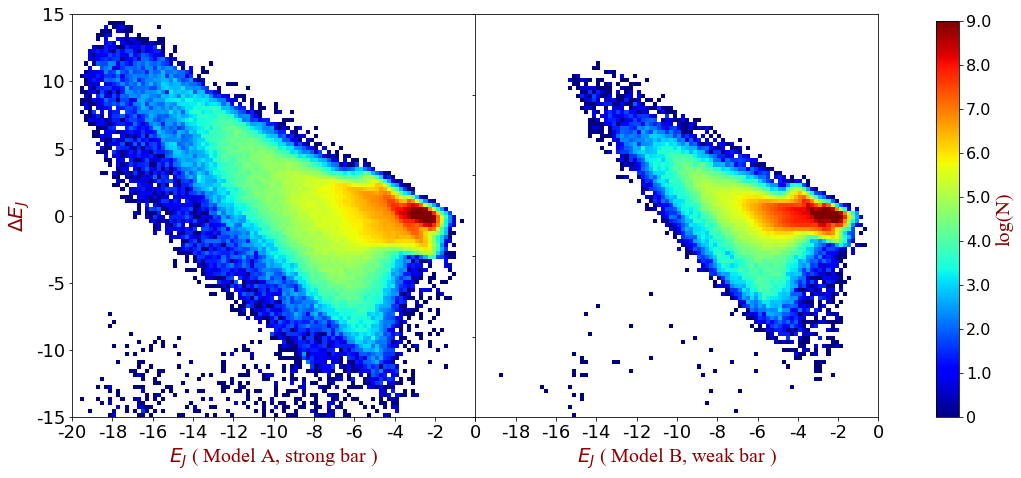

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(AdEj1,AEj1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
#ax.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,7))
ax1.set_yticklabels(('-15', '-10', '-5', '0', '5', '10', '15'))

#set labels
ax1.set_xlabel('$E_{J}$ ( Model A, strong bar )',fontdict=font)
ax1.set_ylabel('$\Delta E_{J}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(BdEj1,BEj1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$E_{J}$ ( Model B, weak bar )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#title
#titleStr='Change of $E_{J}$ from T = '+str(nn-dn)+' to '+str(nn)
#plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/dEj_dt'+str(dn1)+'_cmpAB.png'
plt.savefig(figname1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


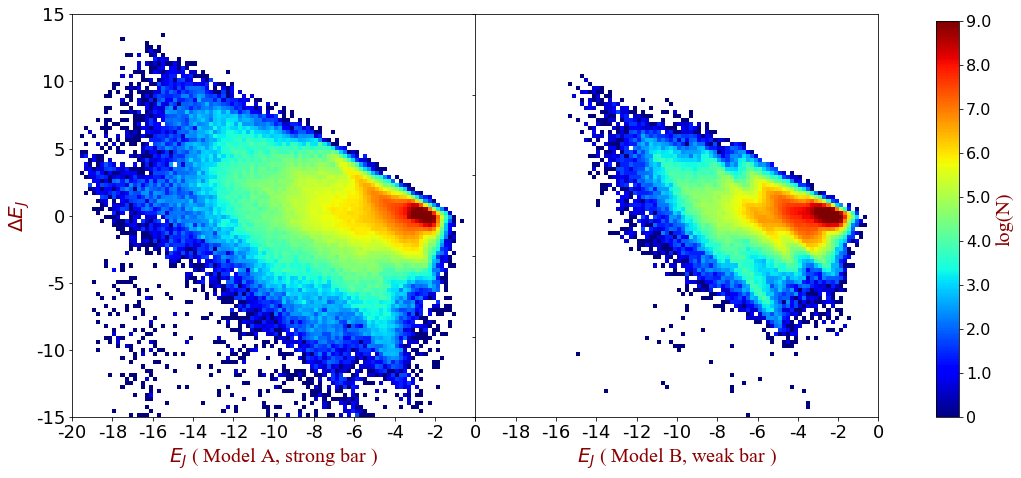

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(AdEj2,AEj1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-20', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
#ax.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,7))
ax1.set_yticklabels(('-15', '-10', '-5', '0', '5', '10', '15'))

#set labels
ax1.set_xlabel('$E_{J}$ ( Model A, strong bar )',fontdict=font)
ax1.set_ylabel('$\Delta E_{J}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(BdEj2,BEj1,bins=(100,100),range=([-15.0, 15.0],[-20.0,0]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-18', '-16', '-14', '-12', '-10', '-8', '-6', '-4', '-2', '0'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$E_{J}$ ( Model B, weak bar )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#title
#titleStr='Change of $E_{J}$ from T = '+str(nn-dn)+' to '+str(nn)
#plt.title(titleStr,fontdict=font)

#savefig
figname2='./output/dEj_dt'+str(dn2)+'_cmpAB.png'
plt.savefig(figname2)

2.change of angular momentum
----

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


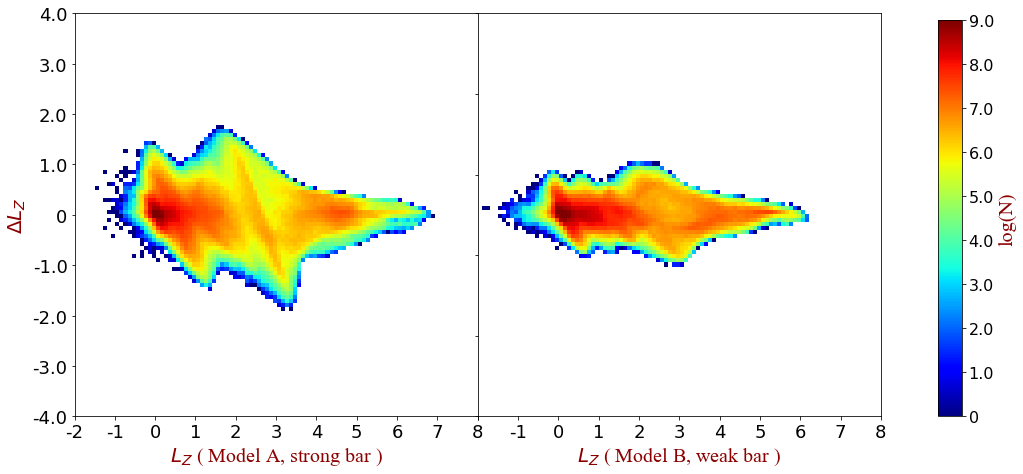

In [9]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(Ada1,Aang1,bins=(100,100),range=([-4.,4.],[-2.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax1.set_xlabel('$L_{Z}$ ( Model A, strong bar )',fontdict=font)
ax1.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(Bda1,Bang1,bins=(100,100),range=([-4.,4.],[-2,8]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$L_{Z}$ ( Model B, weak bar )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname3='./output/da_dt'+str(dn1)+'_cmpAB.png'
plt.savefig(figname3)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


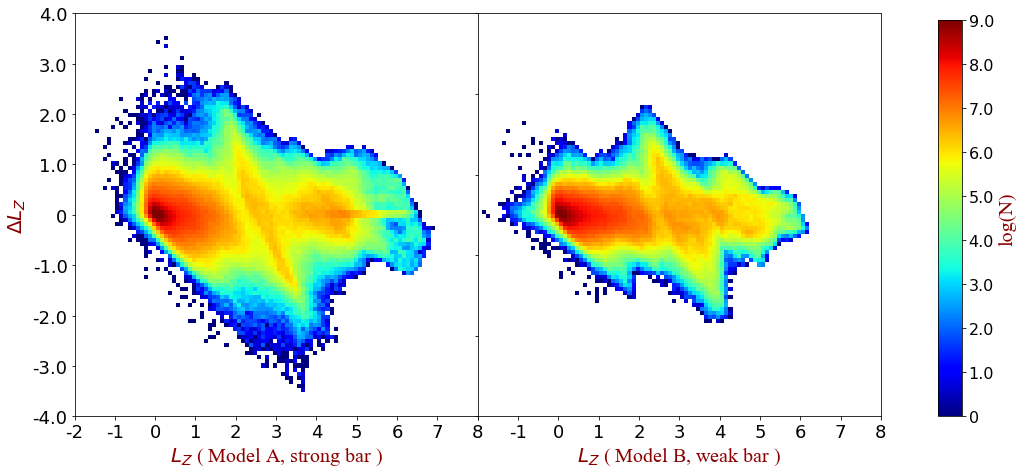

In [10]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2 = fig.add_axes([0.45, 0.1, 0.35, 0.8])
ax1.tick_params(direction='out',labelsize=18)
ax2.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(Ada2,Aang1,bins=(100,100),range=([-4.,4.],[-2.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax1.set_xlabel('$L_{Z}$ ( Model A, strong bar )',fontdict=font)
ax1.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(Bda2,Bang1,bins=(100,100),range=([-4.,4.],[-2,8]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( ('', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
ax2.set_yticklabels( (''))

#set labels
ax2.set_xlabel('$L_{Z}$ ( Model B, weak bar )',fontdict=font)
ax2.set_ylabel('')

#colorbar
cbar_ax = fig.add_axes([0.85, 0.22, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname4='./output/da_dt'+str(dn2)+'_cmpAB.png'
plt.savefig(figname4)